## Minor Project                                                                                                      
Raghavendra K

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns
from scipy import stats
plot.rcParams["figure.figsize"] = 15,7

In [3]:
data=pd.read_csv("StudentsPerformance (3).csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no null values in the dataFrame.

In [5]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
#grouping the math score
group = ['0-19','20-39','40-59','60-79','80-99','100']
data["mathscore_range"]= pd.cut(data["math score"],range(0,125,20),right=False, labels=group)
print(data["math score"].head())
data["mathscore_range"].head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64


0    60-79
1    60-79
2    80-99
3    40-59
4    60-79
Name: mathscore_range, dtype: category
Categories (6, object): [0-19 < 20-39 < 40-59 < 60-79 < 80-99 < 100]

In [9]:
#grouping the reading score
group = ['0-19','20-39','40-59','60-79','80-99','100']
data["readingscore_range"]= pd.cut(data["reading score"],range(0,125,20),right=False, labels=group)
print(data["reading score"].head())
data["readingscore_range"].head()

0    72
1    90
2    95
3    57
4    78
Name: reading score, dtype: int64


0    60-79
1    80-99
2    80-99
3    40-59
4    60-79
Name: readingscore_range, dtype: category
Categories (6, object): [0-19 < 20-39 < 40-59 < 60-79 < 80-99 < 100]

In [10]:
#grouping the writing score
group = ['0-19','20-39','40-59','60-79','80-99','100']
data["writingscore_range"]= pd.cut(data["writing score"],range(0,125,20),right=False, labels=group)
print(data["writing score"].head())
data["writingscore_range"].head()

0    74
1    88
2    93
3    44
4    75
Name: writing score, dtype: int64


0    60-79
1    80-99
2    80-99
3    40-59
4    60-79
Name: writingscore_range, dtype: category
Categories (6, object): [0-19 < 20-39 < 40-59 < 60-79 < 80-99 < 100]

	 gender : 

female    518
male      482
Name: gender, dtype: int64 

['female' 'male']
Mean of math score scores who is female    63.63
female  students maximum marks in math score : 100
female  students minimum marks in math score : 0 

Mean of math score scores who is male    68.73
male  students maximum marks in math score : 100
male  students minimum marks in math score : 27 



Mean of reading score scores who is female    72.61
female  students maximum marks in reading score : 100
female  students minimum marks in reading score : 17 

Mean of reading score scores who is male    65.47
male  students maximum marks in reading score : 100
male  students minimum marks in reading score : 23 



Mean of writing score scores who is female    72.47
female  students maximum marks in writing score : 100
female  students minimum marks in writing score : 10 

Mean of writing score scores who is male    63.31
male  students maximum marks in writing score : 100
male  students minimum marks in 

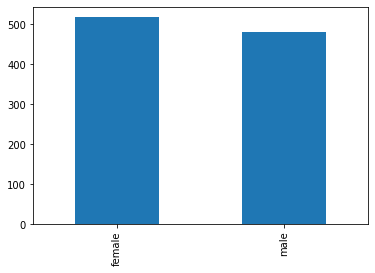

In [11]:
print("\t gender : \n")
print(data["gender"].value_counts(),"\n")
data.gender.value_counts().plot(kind="bar")
list3=data['gender'].unique()
print(list3)
list4=['math score','reading score','writing score']
for j in list4:
    for i in list3:
        print("Mean of",j,"scores who is",i,"   %0.2f"%data[data["gender"]==i][j].mean())
        print(i," students maximum marks in",j,":",data[data["gender"]==i][j].max())
        print(i," students minimum marks in",j,":",data[data["gender"]==i][j].min(),'\n')
    print('\n')

### Inference

1. From the mean of the marks calculated above, the Math scores of male students are distributed arounsd 68% while that for female students around 63%
2. But regarding the Reading and writing scores, Female students score are distributed around 72% and that for male students around 63%.

students who got marks above 80% :
male      119
female     74
Name: gender, dtype: int64 

students who scored 100% :
male      4
female    3
Name: gender, dtype: int64 

Mean of Male Score marks :   68.73
Mean of Female Score marks : 63.63 

ratio_male         0.247
ratio_female       0.143 

meritratio_male    0.008
meritratio_female  0.006


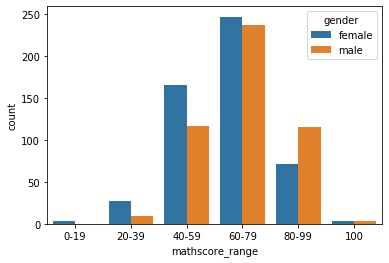

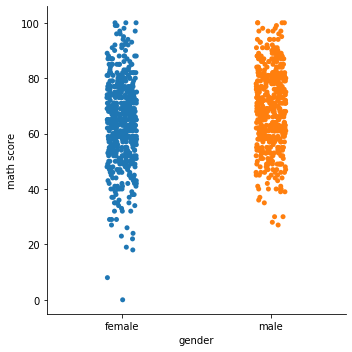

In [12]:
#math score vs gender
sns.countplot("mathscore_range",hue="gender",data=data)
sns.catplot(x='gender',y='math score',data=data)
print("students who got marks above 80% :")
print(data[data["math score"]>=80]["gender"].value_counts(),"\n")
print("students who scored 100% :")
print(data[data["math score"]>=100]["gender"].value_counts(),"\n")
print("Mean of Male Score marks :   %0.2f"%data[data["gender"]=="male"]["math score"].mean())
print("Mean of Female Score marks : %0.2f"%data[data["gender"]=="female"]["math score"].mean(),'\n')
print("ratio_male         %0.3f"%(119/482))
print("ratio_female       %0.3f"%(74/518),'\n')
print("meritratio_male    %0.3f"%(4/518))
print("meritratio_female  %0.3f"%(3/518))

#### CONCLUSIONS:

1. From the above Graphs, it can be deduced that there are more male students who scored more than 80% in the math test
2. It is not accurate to make a conclusin with the number of students above 80% , because the number of male studentrs is not equal to the number of female students.
3. calculating the ratio of students in a particular gender, who scored good, i.e more than 80% :
        1.There is 24.69% of chance that if a student is male,he will score more than 80% in math
        2.There is 14.28% of chance that if a student is female,she will score more than 80% in math
        3.Also, 0.78% of chance that He will score a merit,i.e 100 marks, and 0.58% of chance that she will score merit.
4. Also, from the second graph we can observe that there are very few male students who have scores less than 20% as compared to Female students.         

students who got marks above 80% in reading:
female    167
male       82
Name: gender, dtype: int64 

students who scored 100% in reading:
female    14
male       3
Name: gender, dtype: int64 

Mean of Male Score marks :   65.47
Mean of Female Score marks : 72.61 

ratio_male          0.170
ratio_female        0.322 

meritratio_male     0.006
meritratio_female   0.027


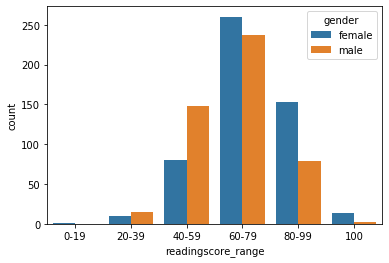

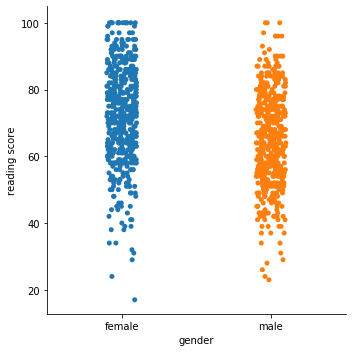

In [13]:
#reading score vs gender
sns.countplot("readingscore_range",hue="gender",data=data)
sns.catplot(x='gender',y='reading score',data=data)
print("students who got marks above 80% in reading:")
print(data[data["reading score"]>=80]["gender"].value_counts(),"\n")
print("students who scored 100% in reading:")
print(data[data["reading score"]>=100]["gender"].value_counts(),"\n")
print("Mean of Male Score marks :   %0.2f"%data[data["gender"]=="male"]["reading score"].mean())
print("Mean of Female Score marks : %0.2f"%data[data["gender"]=="female"]["reading score"].mean(),'\n')
print("ratio_male          %0.3f"%(82/482))
print("ratio_female        %0.3f"%(167/518),"\n")
print("meritratio_male     %0.3f"%(3/518))
print("meritratio_female   %0.3f"%(14/518))

#### CONCLUSIONS:
1. From the above Graph, it can be deduced that there are more Female students who scored more than 80% in reading.
2. It is not accurate to make a conclusin with the number of students above 80%, because the number of male students is not equal to the number of female students.
3. calculating the ratio of students in a particular gender, who scored good, i.e more than 80% :
        1.There is 17% of chance that if a student is male,he will score more than 80% in Reading
        2.There is 32.2% of chance that if a student is female,she will score more than 80% in Reading
        3.Also, 0.58% of chance that He will score a merit,i.e 100 marks, and 2.7% of chance that she will score merit.
4. Also, in the second graph the male students score is concentrated in the middle and lower half.So, there is more chance that a Female student can score more.             

students who got marks above 80% in writing:
female    172
male       63
Name: gender, dtype: int64 

students who scored 100% in writing:
female    13
male       1
Name: gender, dtype: int64 

Mean of Male Score marks :   63.31
Mean of Female Score marks : 72.47 

ratio_male          0.131
ratio_female        0.332 

meritratio_male     0.002
meritratio_female   0.025


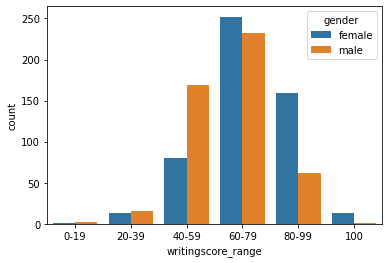

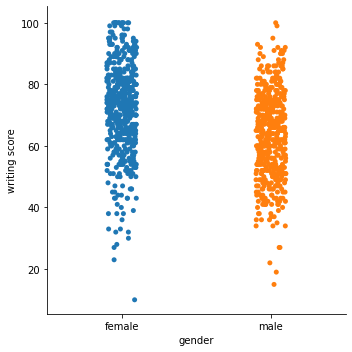

In [14]:
#writing score vs gender
sns.countplot("writingscore_range",hue="gender",data=data)
sns.catplot(x='gender',y='writing score',data=data)
print("students who got marks above 80% in writing:")
print(data[data["writing score"]>=80]["gender"].value_counts(),"\n")
print("students who scored 100% in writing:")
print(data[data["writing score"]>=100]["gender"].value_counts(),"\n")
print("Mean of Male Score marks :   %0.2f"%data[data["gender"]=="male"]["writing score"].mean())
print("Mean of Female Score marks : %0.2f"%data[data["gender"]=="female"]["writing score"].mean(),'\n')
print("ratio_male          %0.3f"%(63/482))
print("ratio_female        %0.3f"%(172/518),"\n")
print("meritratio_male     %0.3f"%(1/518))
print("meritratio_female   %0.3f"%(13/518))

### CONCLUSIONS:
1. From the above Graph, it can be deduced that there are more Female students who scored more than 80% in the writing.
2. calculating the ratio of students in a particular gender, who scored good, i.e more than 80% :
        1.There is 13% of chance that if a student is male,he will score more than 80% in writing
        2.There is 33.2% of chance that if a student is female,she will score more than 80% in writing
        3.Also, 0.2% of chance that He will score a merit,i.e 100 marks, and 2.5% of chance that she will score merit.

3. so, we can conclude that the math , reading and writing scores has a dependency on the gender.            

	 parental level of education : 

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64 

Mean of math score with parents from bachelor's degree as background :   69.39
maximum marks of students with parents from bachelor's degree as background in math score : 100
minimum marks of students with parents from bachelor's degree as background in math score : 29 

Mean of math score with parents from some college as background :   67.13
maximum marks of students with parents from some college as background in math score : 100
minimum marks of students with parents from some college as background in math score : 19 

Mean of math score with parents from master's degree as background :   69.75
maximum marks of students with parents from master's degree as background in math score : 95
minimum marks of students with parents from master's degree a

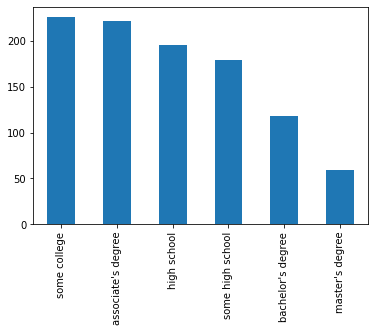

In [15]:
print("\t parental level of education : \n")
print(data["parental level of education"].value_counts(),"\n")
data["parental level of education"].value_counts().plot(kind="bar")
list3=data['parental level of education'].unique()
list4=['math score','reading score','writing score']
for j in list4:
    for i in list3:
        print("Mean of",j,"with parents from",i,"as background :   %0.2f"%data[data["parental level of education"]==i][j].mean())
        print("maximum marks of students with parents from",i,"as background in",j,":",data[data["parental level of education"]==i][j].max())
        print("minimum marks of students with parents from",i,"as background in",j,":",data[data["parental level of education"]==i][j].min(),'\n')
    print('\n')

### Conclusions:
1. From the Values calculated above,for Math scores, the scores of Students with parents from assoisates degree, bachelor's degree and master's degree is distributed around 69%.
2. From the Values calculated above,for Reading scores, the scores of Students with parents from assoisates degree, bachelor's degree and master's degree is distributed around 73% and 75%.
3. From the Values calculated above,for Math scores, the scores of Students with parents from bachelor's degree and master's degree is distributed around 75%.
4. Also, the merit students considering any subject is observed to be from the students from parents background of bachelor's degree, some college and Masters degree.

students who got marks above 80% in math:
associate's degree    60
some college          41
bachelor's degree     28
some high school      26
high school           20
master's degree       18
Name: parental level of education, dtype: int64 

students who scored 100% in math:
some college          3
bachelor's degree     2
associate's degree    2
Name: parental level of education, dtype: int64 

The probability that a student with a parental level of education scoring good in math
some college        18.142  %
associate's degree  27.027  %
high school         10.204  %
some high school    14.525  %
bachelor's degree   23.729  %
master's degree     30.508  %


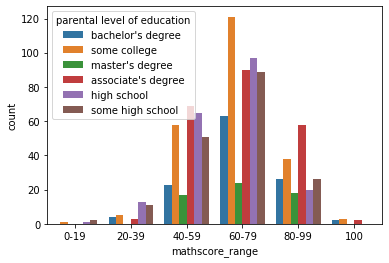

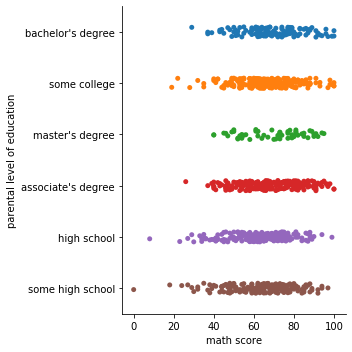

In [16]:
#math score vs parental level of education
sns.countplot(x="mathscore_range", data=data, hue = 'parental level of education')
sns.catplot(y='parental level of education',x='math score',data=data)
print("students who got marks above 80% in math:")
print(data[data["math score"]>=80]["parental level of education"].value_counts(),"\n")
print("students who scored 100% in math:")
print(data[data["math score"]>=100]["parental level of education"].value_counts(),"\n")
list1=[41/226,60/222,20/196,26/179,28/118,18/59]
print("The probability that a student with a parental level of education scoring good in math")
print("some college        %.3f"%(list1[0]*100),' %')
print("associate's degree  %.3f"%(list1[1]*100),' %')
print("high school         %.3f"%(list1[2]*100),' %')
print("some high school    %.3f"%(list1[3]*100),' %')
print("bachelor's degree   %.3f"%(list1[4]*100),' %')
print("master's degree     %.3f"%(list1[5]*100),' %')

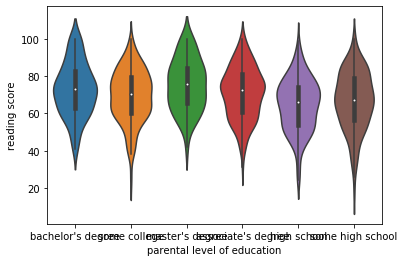

In [17]:
sns.violinplot(y='reading score',x='parental level of education',data=data)

### Conclusions

1. From the Two graphs above,we can derive that students who have Bachelor's degree and Master's degree have more density in 100% than compared to students with other educational baground(From the violin plot). 
2. There are more number of students who scored less than 40% who has parents with Hish school educational baground.
3. Also, from the ratios, there is a highest with 30.5% of chance that if the parents of Masters degree baground, they will score good in math. followed by Bachelors degree and assoiates degree.
4. so we can conclude that, if the parents are from high school and some college, there is less chance that they can score good,i.e around 13% probability.


students who got marks above 80% in reading:
associate's degree    60
some college          57
some high school      42
bachelor's degree     35
high school           30
master's degree       25
Name: parental level of education, dtype: int64 

students who scored 100% in reading:
bachelor's degree     8
associate's degree    4
some high school      2
master's degree       2
some college          1
Name: parental level of education, dtype: int64 

The probability that a student with a parental level of education scoring good in Reading
some college        25.221  %
associate's degree  27.027  %
high school         15.306  %
some high school    23.464  %
bachelor's degree   29.661  %
master's degree     42.373  %


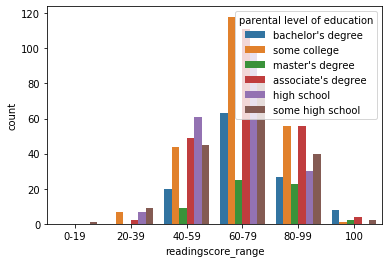

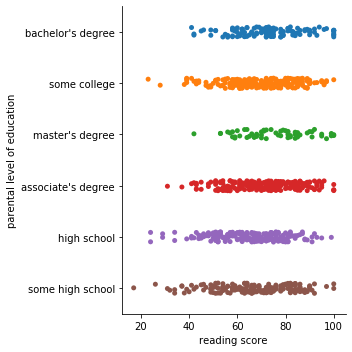

In [18]:
#reading score vs parental level of education
sns.countplot(x="readingscore_range", data=data, hue = 'parental level of education')
sns.catplot(x='reading score',y='parental level of education',data=data)
print("students who got marks above 80% in reading:")
print(data[data["reading score"]>=80]["parental level of education"].value_counts(),"\n")
print("students who scored 100% in reading:")
print(data[data["reading score"]>=100]["parental level of education"].value_counts(),"\n")
list2=[57/226,60/222,30/196,42/179,35/118,25/59]
print("The probability that a student with a parental level of education scoring good in Reading")
print("some college        %.3f"%(list2[0]*100),' %')
print("associate's degree  %.3f"%(list2[1]*100),' %')
print("high school         %.3f"%(list2[2]*100),' %')
print("some high school    %.3f"%(list2[3]*100),' %')
print("bachelor's degree   %.3f"%(list2[4]*100),' %')
print("master's degree     %.3f"%(list2[5]*100),' %')

### Conclusions

1. From the Two graphs above,we can derive that students who have Bachelor's degree and Master's degree have more density in 100% than compared to students with other educational baground. 
2. There are more number of students who scored less than 40% who has parents with Hish school educational baground.
3. Also, we can see that from the ratios there is 40% chance that if the students has parents from masters degree backgroung he/she will score more than 80% in reading. whereas, only 15-20% of chance that if the parents are from High school background, students will score more in reading.
4. The scores of the students with assosiate degree background is concentrated from 60-100% .  

students who got marks above 80% in writing:
associate's degree    60
some college          55
bachelor's degree     43
some high school      32
master's degree       23
high school           22
Name: parental level of education, dtype: int64 

students who scored 100% in writing:
bachelor's degree     7
master's degree       4
associate's degree    1
some high school      1
high school           1
Name: parental level of education, dtype: int64 

The probability that a student with a parental level of education scoring good in Writing
some college        24.336  %
associate's degree  27.027  %
high school         11.224  %
some high school    17.877  %
bachelor's degree   36.441  %
master's degree     38.983  %


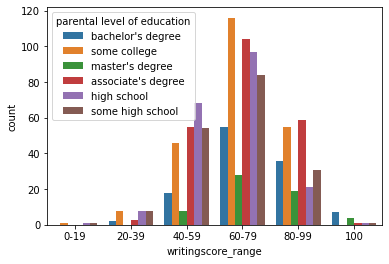

In [19]:
#writing score vs parental level of education
sns.countplot(x="writingscore_range", data=data, hue = 'parental level of education')
print("students who got marks above 80% in writing:")
print(data[data["writing score"]>=80]["parental level of education"].value_counts(),"\n")
print("students who scored 100% in writing:")
print(data[data["writing score"]>=100]["parental level of education"].value_counts(),"\n")
list3=[55/226,60/222,22/196,32/179,43/118,23/59]
print("The probability that a student with a parental level of education scoring good in Writing")
print("some college        %.3f"%(list3[0]*100),' %')
print("associate's degree  %.3f"%(list3[1]*100),' %')
print("high school         %.3f"%(list3[2]*100),' %')
print("some high school    %.3f"%(list3[3]*100),' %')
print("bachelor's degree   %.3f"%(list3[4]*100),' %')
print("master's degree     %.3f"%(list3[5]*100),' %')

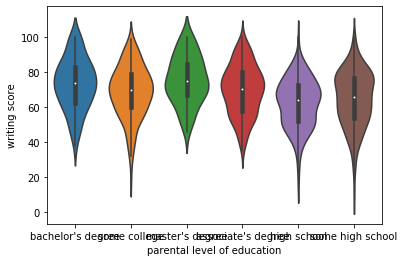

In [20]:
sns.violinplot(y='writing score',x='parental level of education',data=data)

### Conclusions

1. From the violin plot above,we can derive that students who have Bachelor's degree and Master's degree background parents  have more density in 100% than compared to students with other educational background. 
2. There are more number of students who scored less than 40% who has parents with Hish school educational background.
3. Ther is 39% and 37% of chance that if the parents are from Bachelor's or Masters degree, the students will score good in writing.
4. so we can conclude that, if the parents are from high school and some college, there is less chance that they can score good,i.e around 13% probability.so, parental level of education affects the scores of the students.

	 lunch : 

standard        645
free/reduced    355
Name: lunch, dtype: int64 

Mean of math score who receive standard food :   70.03
Max marks of students who receive standard food in math score : 100
Min marks of students who receive standard food in math score : 19 

Mean of math score who receive free/reduced food :   58.92
Max marks of students who receive free/reduced food in math score : 100
Min marks of students who receive free/reduced food in math score : 0 



Mean of reading score who receive standard food :   71.65
Max marks of students who receive standard food in reading score : 100
Min marks of students who receive standard food in reading score : 26 

Mean of reading score who receive free/reduced food :   64.65
Max marks of students who receive free/reduced food in reading score : 100
Min marks of students who receive free/reduced food in reading score : 17 



Mean of writing score who receive standard food :   70.82
Max marks of students who receive standard food i

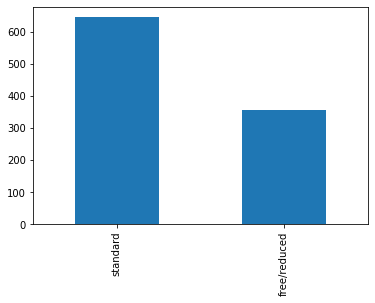

In [21]:
print("\t lunch : \n")
print(data["lunch"].value_counts(),"\n")
data["lunch"].value_counts().plot(kind="bar")
list3=data['lunch'].unique()
list4=['math score','reading score','writing score']
for j in list4:
    for i in list3:
        print("Mean of",j,"who receive",i,"food :   %0.2f"%data[data["lunch"]==i][j].mean())
        print("Max marks of students who receive",i,"food in",j,":",data[data["lunch"]==i][j].max())
        print("Min marks of students who receive",i,"food in",j,":",data[data["lunch"]==i][j].min(),'\n')
    print('\n')

 ### Conclusions:
 1. Considering any subject, the scores of students who receive Standard food is distributed about 70-75% , whereas for free/reduced food around 60%. 

STudents scoring more than 80% in math :
standard        171
free/reduced     22
Name: lunch, dtype: int64 

Students who scored merit in math :
standard        6
free/reduced    1
Name: lunch, dtype: int64 

Probability of scoring Good: 
ratio_standard               26.51  %
ratio_free/reduced           6.20  %

Probability of scoring merit in writing: 
ratio_standard               0.93  %
ratio_free/reduced           0.28  %


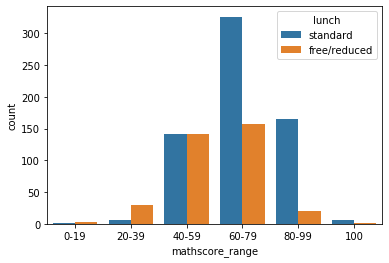

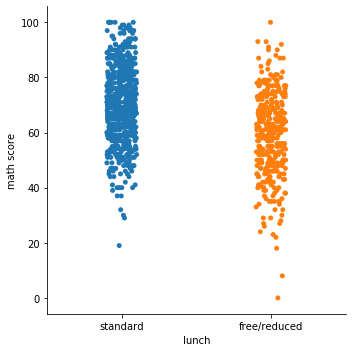

In [22]:
#lunch vs math score
sns.countplot(x="mathscore_range",data=data,hue="lunch")
sns.catplot(x="lunch",y="math score",data=data)
print("STudents scoring more than 80% in math :")
print(data[data["math score"]>=80]["lunch"].value_counts(),'\n')
print("Students who scored merit in math :")
print(data[data["math score"]==100]["lunch"].value_counts(),'\n')
print("Probability of scoring Good: ")
print("ratio_standard               %0.2f"%((171/645)*100),' %')
print("ratio_free/reduced           %0.2f"%((22/355)*100),' %\n')
print("Probability of scoring merit in writing: ")
print("ratio_standard               %0.2f"%((6/645)*100),' %')
print("ratio_free/reduced           %0.2f"%((1/355)*100),' %')

### Conclusions:

1. From the graphs above, it can be deduced that the students who receive Standard food are scoring good.
2. The scores of students who receive free/reduced food is concentrated in the lower score regions.
3. From the second graph, we can observe that the blue region is placed above the orange region.
4. Also, from the ratios , Students who receive Standard food has the higher chance,i.e 27%, for scoring good in Math.Whereas, Students who receive free/reduced food, have lower chance to score more,as low as 6.5%.
5. Also, there are more number of students who have received less than 20% in math who receive free/reduced food.

STudents scoring more than 80% in reading :
standard        194
free/reduced     55
Name: lunch, dtype: int64 

Students who scored merit in reading :
standard        14
free/reduced     3
Name: lunch, dtype: int64 

Probability of scoring Good: 
ratio_standard               30.23  %
ratio_free/reduced           15.49  %

Probability of scoring merit: 
ratio_standard               2.17  %
ratio_free/reduced           0.85  %


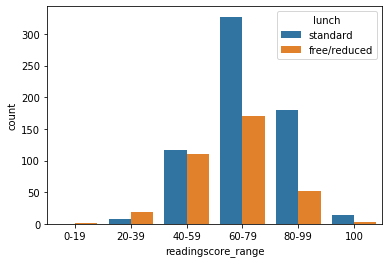

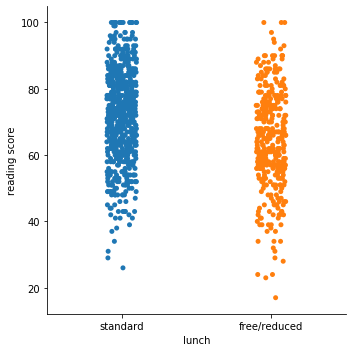

In [23]:
#lunch vs reading score
sns.countplot(x="readingscore_range",data=data,hue="lunch")
sns.catplot(x="lunch",y="reading score",data=data)
print("STudents scoring more than 80% in reading :")
print(data[data["reading score"]>=80]["lunch"].value_counts(),'\n')
print("Students who scored merit in reading :")
print(data[data["reading score"]==100]["lunch"].value_counts(),'\n')
print("Probability of scoring Good: ")
print("ratio_standard               %0.2f"%((195/645)*100),' %')
print("ratio_free/reduced           %0.2f"%((55/355)*100),' %\n')
print("Probability of scoring merit: ")
print("ratio_standard               %0.2f"%((14/645)*100),' %')
print("ratio_free/reduced           %0.2f"%((3/355)*100),' %')

### Conclusions:

1. From the graphs above, it can be deduced that the students who receive Standard food are scoring good in Reading too.
2. There are more students who got less than 40% in reading who receive free/reduced food
3. From the second graph, we can observe that the blue region is placed above the orange region.
4. Also, from the ratios , Students who receive Standard food has the higher chance,i.e 30%, for scoring good in reading.Whereas, Students who receive free/reduced food, have lower chance to score more,as low as 15.5%.

STudents scoring more than 80% in writing :
standard        181
free/reduced     54
Name: lunch, dtype: int64 

Students who scored merit in writing :
standard        11
free/reduced     3
Name: lunch, dtype: int64 

Probability of scoring Good in writing: 
ratio_standard               28.06  %
ratio_free/reduced           15.21  %

Probability of scoring merit in writing: 
ratio_standard               1.71  %
ratio_free/reduced           0.85  %


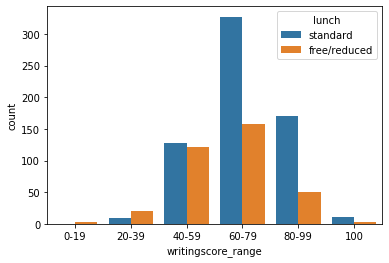

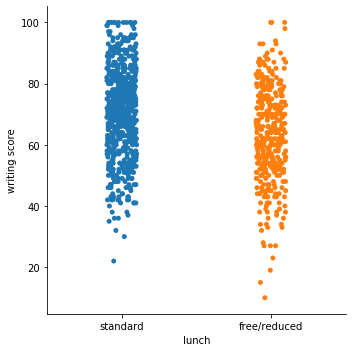

In [24]:
#lunch vs writing score
sns.countplot(x="writingscore_range",data=data,hue="lunch")
sns.catplot(x="lunch",y="writing score",data=data)
print("STudents scoring more than 80% in writing :")
print(data[data["writing score"]>=80]["lunch"].value_counts(),'\n')
print("Students who scored merit in writing :")
print(data[data["writing score"]==100]["lunch"].value_counts(),'\n')
print("Probability of scoring Good in writing: ")
print("ratio_standard               %0.2f"%((181/645)*100),' %')
print("ratio_free/reduced           %0.2f"%((54/355)*100),' %\n')
print("Probability of scoring merit in writing: ")
print("ratio_standard               %0.2f"%((11/645)*100),' %')
print("ratio_free/reduced           %0.2f"%((3/355)*100),' %')

### Conclusions:

1. From the graphs above, it can be deduced that the students who receive Standard food are scoring good in every subject.
2. There are more students who got less than 40% in writing who receive free/reduced food.
3. Also, from the ratios , Students who receive Standard food has the higher chance,i.e 28%, for scoring good in writing.Whereas, Students who receive free/reduced food, have lower chance to score more,as low as 15.2%.
4. Comparing the students who receive standard and free food, there is a more chance that if the student receives standard food he willl score merit than students receive free/standard food in any subject.

	 race/ethnicity : 

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64 

Mean of math score who belongs to group B  :   63.45
Max marks of students who belongs to group B in math score : 97
Min marks of students who receive group B in math score : 8 

Mean of math score who belongs to group C  :   64.46
Max marks of students who belongs to group C in math score : 98
Min marks of students who receive group C in math score : 0 

Mean of math score who belongs to group A  :   61.63
Max marks of students who belongs to group A in math score : 100
Min marks of students who receive group A in math score : 28 

Mean of math score who belongs to group D  :   67.36
Max marks of students who belongs to group D in math score : 100
Min marks of students who receive group D in math score : 26 

Mean of math score who belongs to group E  :   73.82
Max marks of students who belongs to group E in math score : 100
Min marks of students who rec

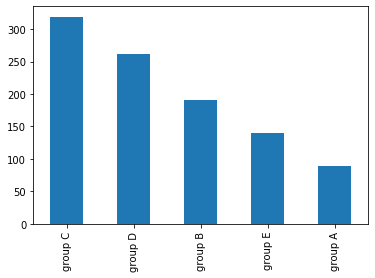

In [25]:
print("\t race/ethnicity : \n")
print(data["race/ethnicity"].value_counts(),"\n")
data["race/ethnicity"].value_counts().plot(kind="bar")
list3=data['race/ethnicity'].unique()
list4=['math score','reading score','writing score']
for j in list4:
    for i in list3:
        print("Mean of",j,"who belongs to",i," :   %0.2f"%data[data["race/ethnicity"]==i][j].mean())
        print("Max marks of students who belongs to",i,"in",j,":",data[data["race/ethnicity"]==i][j].max())
        print("Min marks of students who receive",i,"in",j,":",data[data["race/ethnicity"]==i][j].min(),'\n')
    print('\n')

STudents scoring more than 80% in writing :
group C    75
group D    67
group E    40
group B    38
group A    15
Name: race/ethnicity, dtype: int64 

Students who scored merit in writing :
group D    7
group E    6
group C    1
Name: race/ethnicity, dtype: int64 

Probability of scoring Good in writing: 
ratio_Group A           16.85 %
ratio_Group B           20.00 %
ratio_Group C           23.51 %
ratio_Group D           25.57 %
ratio_Group E           28.57 %

Probability of scoring merit in writing: 
ratio_Group A           0.00 %
ratio_Group B           0.00 %
ratio_Group C           0.31 %
ratio_Group D           2.67 %
ratio_Group E           4.29 %


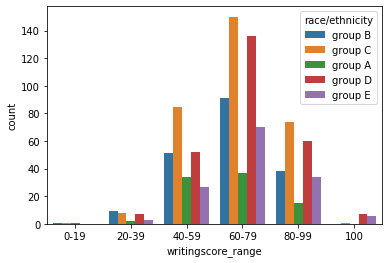

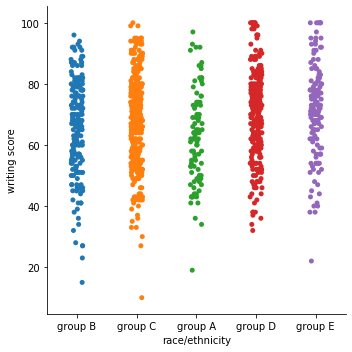

In [26]:
#race vs writing score
sns.countplot(x="writingscore_range",data=data,hue="race/ethnicity")
sns.catplot(x="race/ethnicity",y="writing score",data=data)
print("STudents scoring more than 80% in writing :")
print(data[data["writing score"]>=80]["race/ethnicity"].value_counts(),'\n')
print("Students who scored merit in writing :")
print(data[data["writing score"]==100]["race/ethnicity"].value_counts(),'\n')
print("Probability of scoring Good in writing: ")
print("ratio_Group A           %0.2f"%((15/89)*100),'%')
print("ratio_Group B           %0.2f"%((38/190)*100),'%')
print("ratio_Group C           %0.2f"%((75/319)*100),'%')
print("ratio_Group D           %0.2f"%((67/262)*100),'%')
print("ratio_Group E           %0.2f"%((40/140)*100),'%\n')
print("Probability of scoring merit in writing: ")
print("ratio_Group A           %0.2f"%((0)*100),'%')
print("ratio_Group B           %0.2f"%((0)*100),'%')
print("ratio_Group C           %0.2f"%((1/319)*100),'%')
print("ratio_Group D           %0.2f"%((7/262)*100),'%')
print("ratio_Group E           %0.2f"%((6/140)*100),'%')

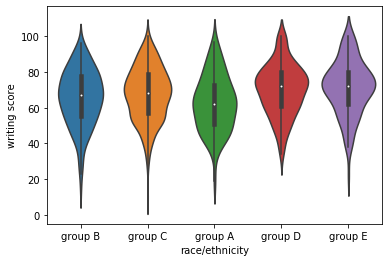

In [27]:
sns.violinplot(y='writing score',x='race/ethnicity',data=data)

### Conclusions:
1. From the above violin plot, Group D ,Group E and Group C student's scores are more broader above 80% than compared to other groups.
2. whereas, The scores of Group A students are broader below 40%.
3. Also , form the ratios, Group E,Group C and Group D students have more chance to score Good in writing, i.e more than 80%, with a probability of 28.6% , 23.5% and 25.6% respectively.
4. if the students belong to Group A and Group B, they have less chance as 15-20% chance that they will score good.
5. Only Group D,E and Group C students Scored merit in writing but group A and Group B did not score any Merit.

STudents scoring more than 80% in reading :
group C    73
group D    63
group B    48
group E    47
group A    18
Name: race/ethnicity, dtype: int64 

Students who scored merit in reading :
group E    7
group D    6
group C    3
group A    1
Name: race/ethnicity, dtype: int64 

Probability of scoring Good in reading: 
ratio_Group A           20.22 %
ratio_Group B           25.26 %
ratio_Group C           22.88 %
ratio_Group D           24.05 %
ratio_Group E           33.57 %

Probability of scoring merit in reading: 
ratio_Group A           1.12 %
ratio_Group B           0.00 %
ratio_Group C           0.94 %
ratio_Group D           2.29 %
ratio_Group E           5.00 %


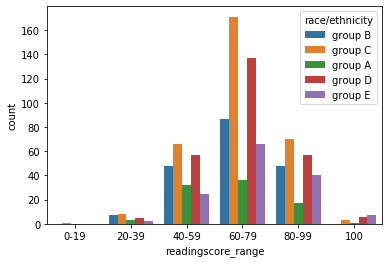

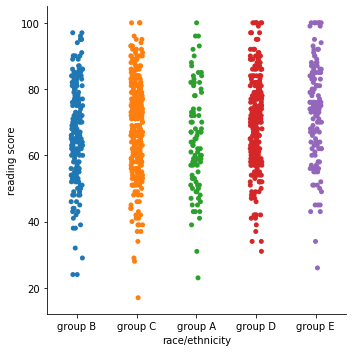

In [28]:
#race vs reading score
sns.countplot(x="readingscore_range",data=data,hue="race/ethnicity")
sns.catplot(x="race/ethnicity",y="reading score",data=data)
print("STudents scoring more than 80% in reading :")
print(data[data["reading score"]>=80]["race/ethnicity"].value_counts(),'\n')
print("Students who scored merit in reading :")
print(data[data["reading score"]==100]["race/ethnicity"].value_counts(),'\n')
print("Probability of scoring Good in reading: ")
print("ratio_Group A           %0.2f"%((18/89)*100),'%')
print("ratio_Group B           %0.2f"%((48/190)*100),'%')
print("ratio_Group C           %0.2f"%((73/319)*100),'%')
print("ratio_Group D           %0.2f"%((63/262)*100),'%')
print("ratio_Group E           %0.2f"%((47/140)*100),'%\n')
print("Probability of scoring merit in reading: ")
print("ratio_Group A           %0.2f"%((1/89)*100),'%')
print("ratio_Group B           %0.2f"%((0)*100),'%')
print("ratio_Group C           %0.2f"%((3/319)*100),'%')
print("ratio_Group D           %0.2f"%((6/262)*100),'%')
print("ratio_Group E           %0.2f"%((7/140)*100),'%')

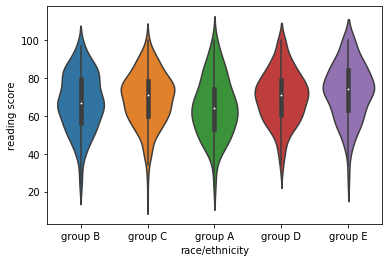

In [29]:
sns.violinplot(y='reading score',x='race/ethnicity',data=data)

### Conclusions:
1. From the above violin plot, Group D ,Group E and Group B student's scores are more broader above 80% than compared to other groups.
2. Also , form the ratios, Group E,Group B and Group D students have more chance to score Good in reading, i.e more than 80%, with a probability of 33.6% , 25.3% and 24% respectively.
3. if the students belong to Group A and Group C, they have less chance, ~20%, that they will score good.
4. Also, if a Student belongs to Group D and E , they have more chance to score merit,i.e 100% , than compared to other groups.

STudents scoring more than 80% in math :
group E    55
group D    51
group C    49
group B    29
group A     9
Name: race/ethnicity, dtype: int64 

Students who scored merit in math :
group E    5
group D    1
group A    1
Name: race/ethnicity, dtype: int64 

Probability of scoring Good in math: 
ratio_Group A           10.11 %
ratio_Group B           15.26 %
ratio_Group C           15.36 %
ratio_Group D           19.47 %
ratio_Group E           39.29 %

Probability of scoring merit in math: 
ratio_Group A           1.12 %
ratio_Group B           0.00 %
ratio_Group C           0.00 %
ratio_Group D           0.38 %
ratio_Group E           3.57 %


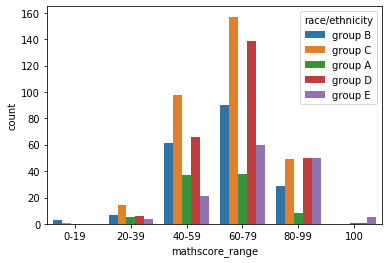

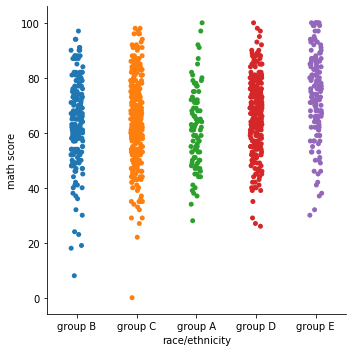

In [30]:
#race vs math score
sns.countplot(x="mathscore_range",data=data,hue="race/ethnicity")
sns.catplot(x="race/ethnicity",y="math score",data=data)
print("STudents scoring more than 80% in math :")
print(data[data["math score"]>=80]["race/ethnicity"].value_counts(),'\n')
print("Students who scored merit in math :")
print(data[data["math score"]==100]["race/ethnicity"].value_counts(),'\n')

print("Probability of scoring Good in math: ")
print("ratio_Group A           %0.2f"%((9/89)*100),'%')
print("ratio_Group B           %0.2f"%((29/190)*100),'%')
print("ratio_Group C           %0.2f"%((49/319)*100),'%')
print("ratio_Group D           %0.2f"%((51/262)*100),'%')
print("ratio_Group E           %0.2f"%((55/140)*100),'%\n')
print("Probability of scoring merit in math: ")
print("ratio_Group A           %0.2f"%((1/89)*100),'%')
print("ratio_Group B           %0.2f"%((0)*100),'%')
print("ratio_Group C           %0.2f"%((0/319)*100),'%')
print("ratio_Group D           %0.2f"%((1/262)*100),'%')
print("ratio_Group E           %0.2f"%((5/140)*100),'%')

### Conclusions:
1. From the above Graphs, Group D  and Group E student's scores are more denser above 80% than compared to other groups.
2. Whereas the students belonging to other groups student's score is denser below 40%.
3. Also , form the ratios, Group E and Group D students have more chance to score Good in math, i.e more than 80%, with a probability of 40% and 20% respectively.
4. There are more number of students belonging to Group A and Group B who scored less, i.e less than 20% , compared to other Students of different groups. 
5. If a student belongs to Group E and Group D, they have more chance to score good,i.e more than 80%, in all the subjects.
6. So, the math, reading and writing scores of the students have a relationship with the race/ethinicity of a student.

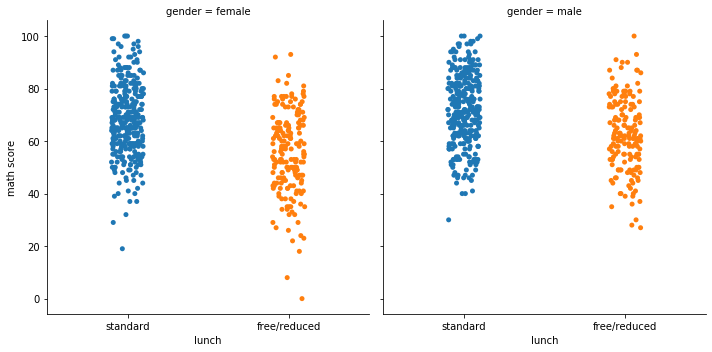

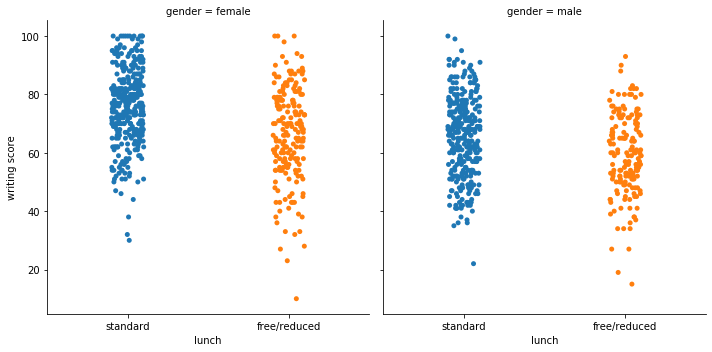

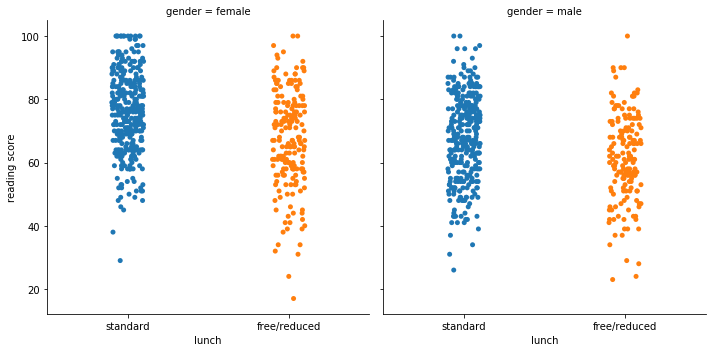

In [31]:
    #Multivairate analysis
sns.catplot(x="lunch",y="math score",data=data,col="gender")
sns.catplot(x="lunch",y="writing score",data=data,col="gender")
sns.catplot(x="lunch",y="reading score",data=data,col="gender")

### Inferences
1. From the above graphs,in the row 1 of math Scores
    1. we can observe that the male students who get Standard food is more denser above 80% than compared to the Female      Students who get the standard food.
    2. However, students irrespective of their gender, who receive free/reduced food have less chance of scoring good in any subject.
    3. Also, there are more Female students who scored less in maths as compared to Male students, irrespective of the food they receive.
2. From the graphs in row 2 and 3 of reading and writing scores:
    1. we can observe that the female students who receive standard food is more denser above 80% in their scores as compared to male students who get the standard food.
    2. Anyways, the students receiving free/reduced food have less chances of scoring good.Also, the points are scattered more in the lower part of the graph.
    3. There are more Female students who get Standard food get merit in reading and Writing

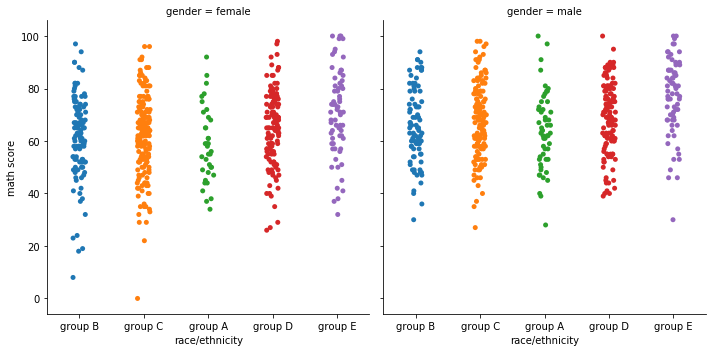

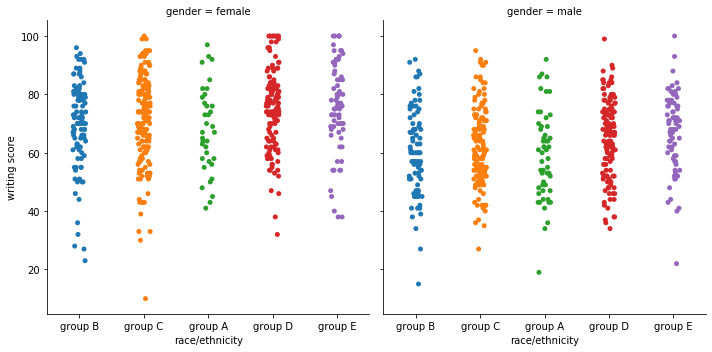

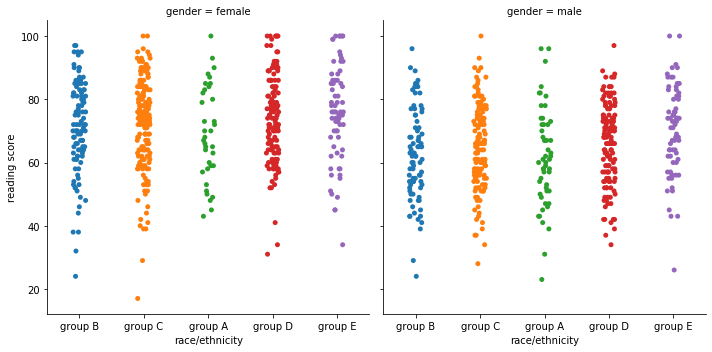

In [32]:
    #Multivairate analysis
sns.catplot(x="race/ethnicity",y="math score",data=data,col="gender")
sns.catplot(x="race/ethnicity",y="writing score",data=data,col="gender")
sns.catplot(x="race/ethnicity",y="reading score",data=data,col="gender")

### Conclusions:
The above graphs are plotted against the scores in the subject and race/ethnicity for the respective genders
1. From the above graphs,it can be observed that the scores of students belonging to Group E and Group D are concentrated in the top region of the graph. 
2. Most of the students who scored less than 20% are the students from Group A,Group B and Group C,irrespective of the gender.
3. if reading scores are concenred,the Female students belonging to Group D has more chance to score more
3. if writing scores are concenred,the Female students belonging to Group D and Group E has more chance to score more
3. if reading scores are concenred,the Female students belonging to Group D has more chance to score more.

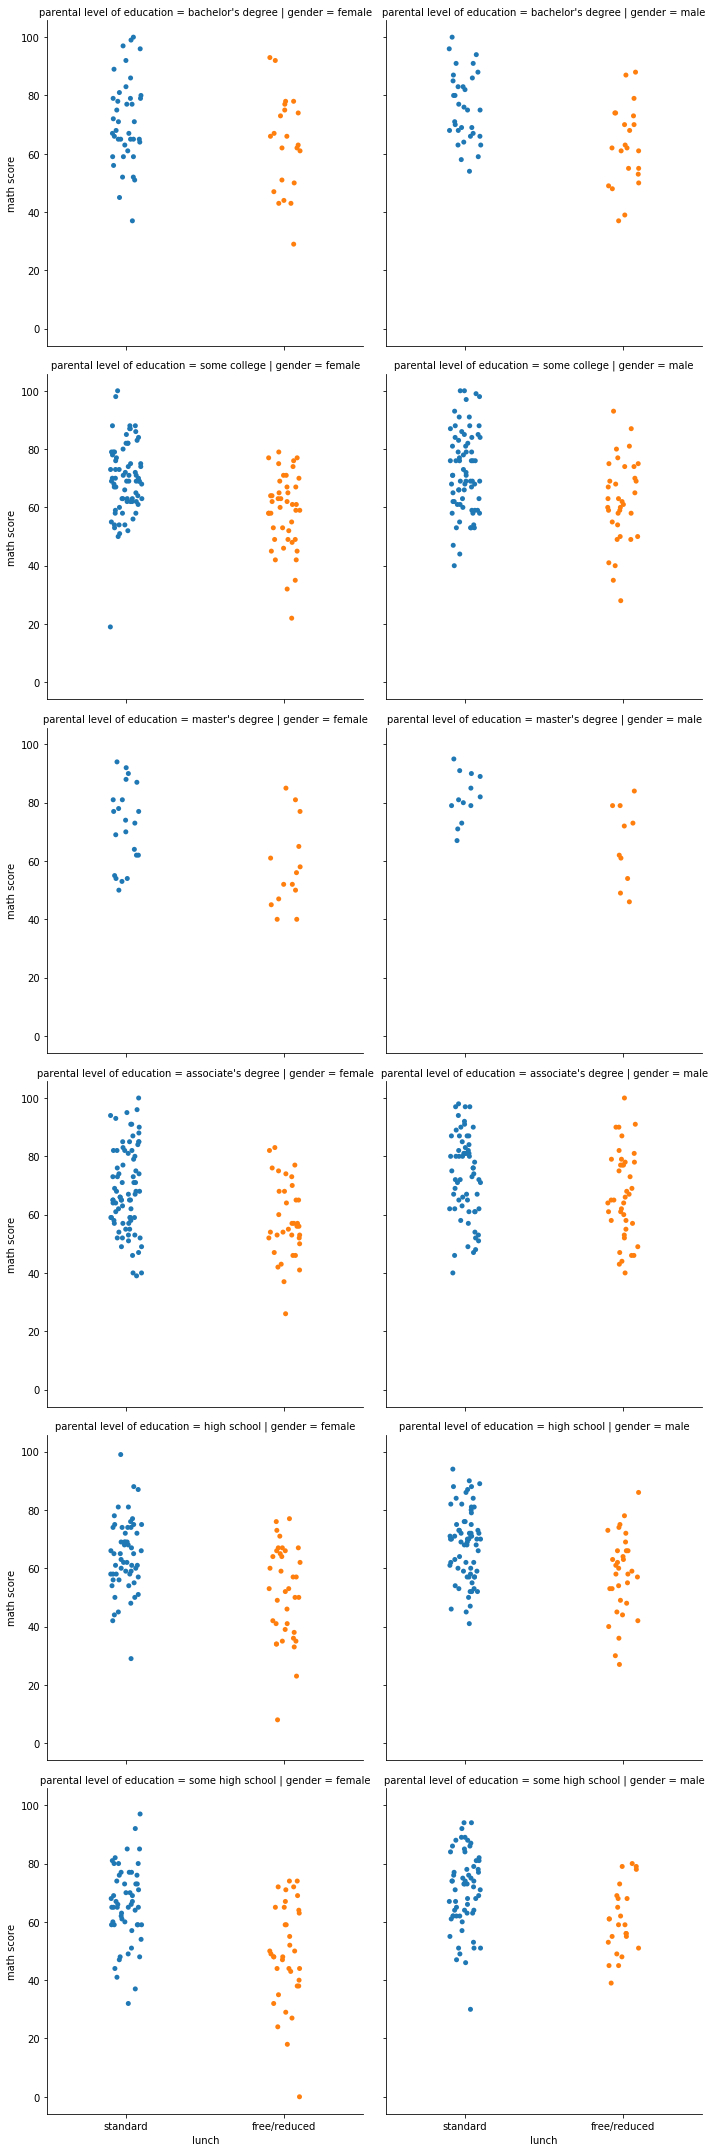

In [33]:
            #Multivariate analysis:
sns.catplot(x="lunch",y="math score",data=data,row="parental level of education",col='gender')

### Conclusions:

The above graps is ploted to compare the Math scores of students who receive Standard and free/reduced food against the educational background of their parents while a particular gender is considered.

1. From the above graphs, it can be observed that in row 1 and row 4,i.e the students with parents from bachelor's and assoicates degree , the density of male Students is concentrated in the above half of the graph. 
2. However, from the above graphs, the Students who get Standard food, irrespective of any other group, score more than the students who receive free/reduced food.
3. we can also observe that all the students who score less than 20% are the students with parents of educational background of some high school or high school or some college and who receive free/reduced food.
4. Most of The scores of Students ,with parents educational background as Masters degree, is all more than 60%, irrespective of the gender.
5. Also, it can be observed that if the student is male and the parents are of Assoisate degree background, have a high chance if scoring More in Math.
6. Though the math scores of students with parents from some high school background is concentrated in on the top, it is also been scattered to as low as <20%.  
7. So, it can be concluded that most of the Students, who has Standard Food and with parents educational background as Master's degree / Bachelor's degre and Assoisates degree, Score more in Math. 


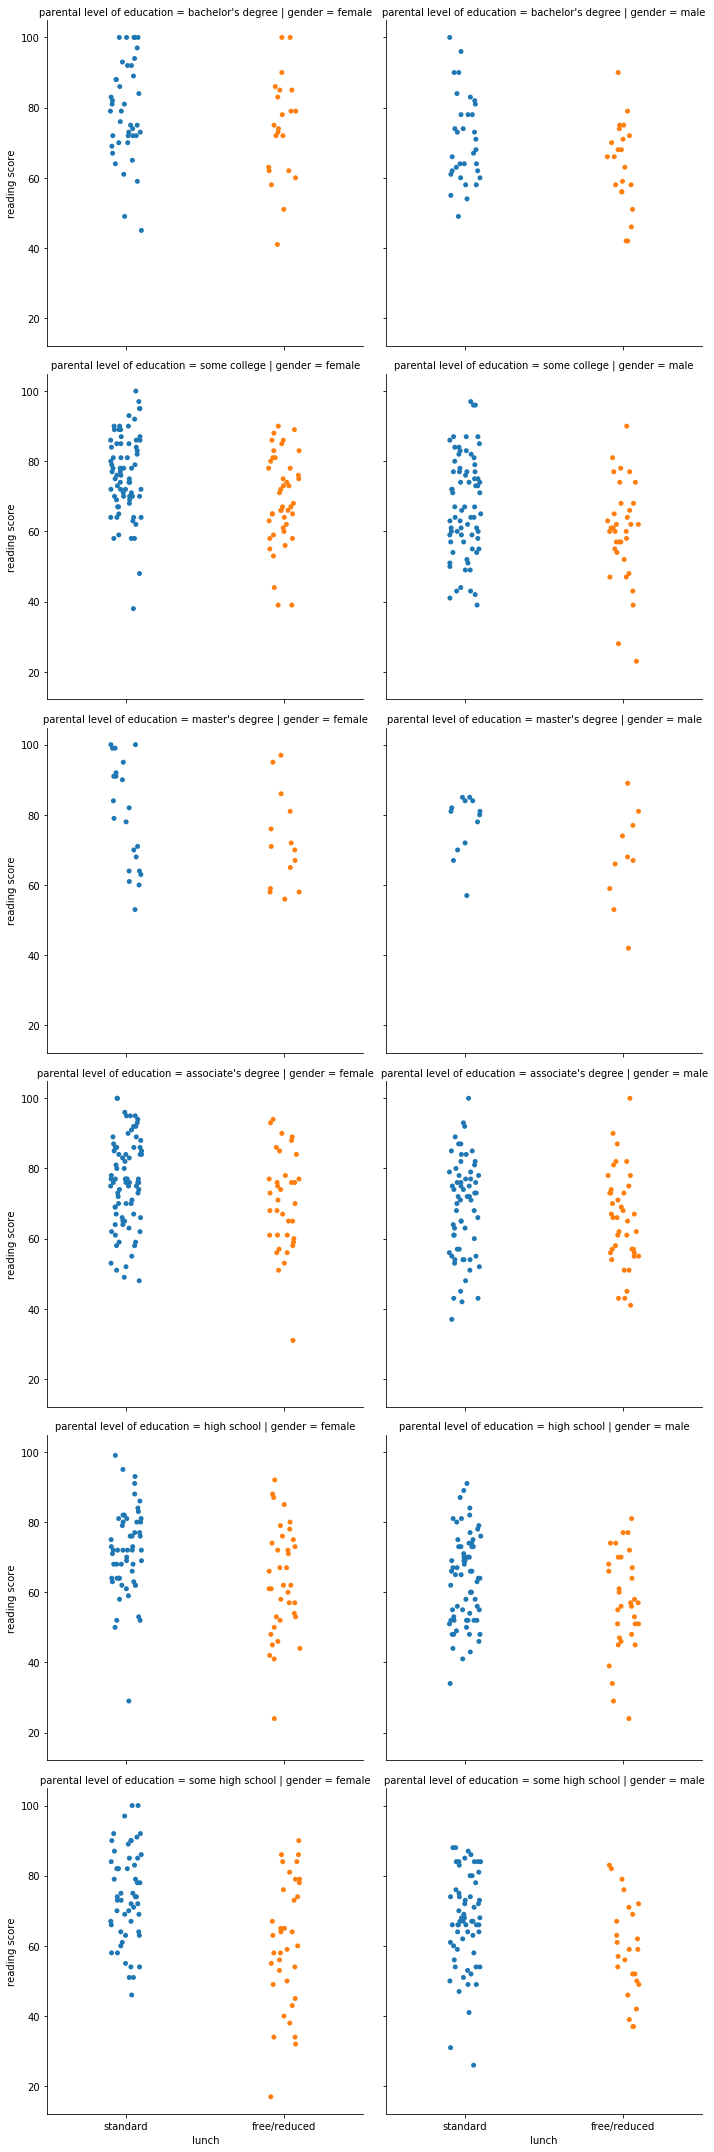

In [34]:
            #Multivariate analysis:
sns.catplot(x="lunch",y="reading score",data=data,row="parental level of education",col='gender')

### Conclusions:

The above graps is ploted to compare the Reading scores of students who receive Standard and free/reduced food against the educational background of their parents while a particular gender is considered.

1. From the above graphs, it can be observed that in row 1 and row 4,i.e the students with parents from bachelor's and assoicates degree , the density of Female Students is concentrated in the  above half of the graph. 
2. However, from the above graphs, the Students who get Standard food, irrespective of any other group, score more than the students who receive free/reduced food.
3. we can also observe that all the students who score less than 20% are the students with parents of educational background of some high school or high school or some college and who receive free/reduced food.
4. Also, it can be observed that the students with parents in Some college as educational background also have more chance of scoring more. However, the students who got less score also belong to the same category.

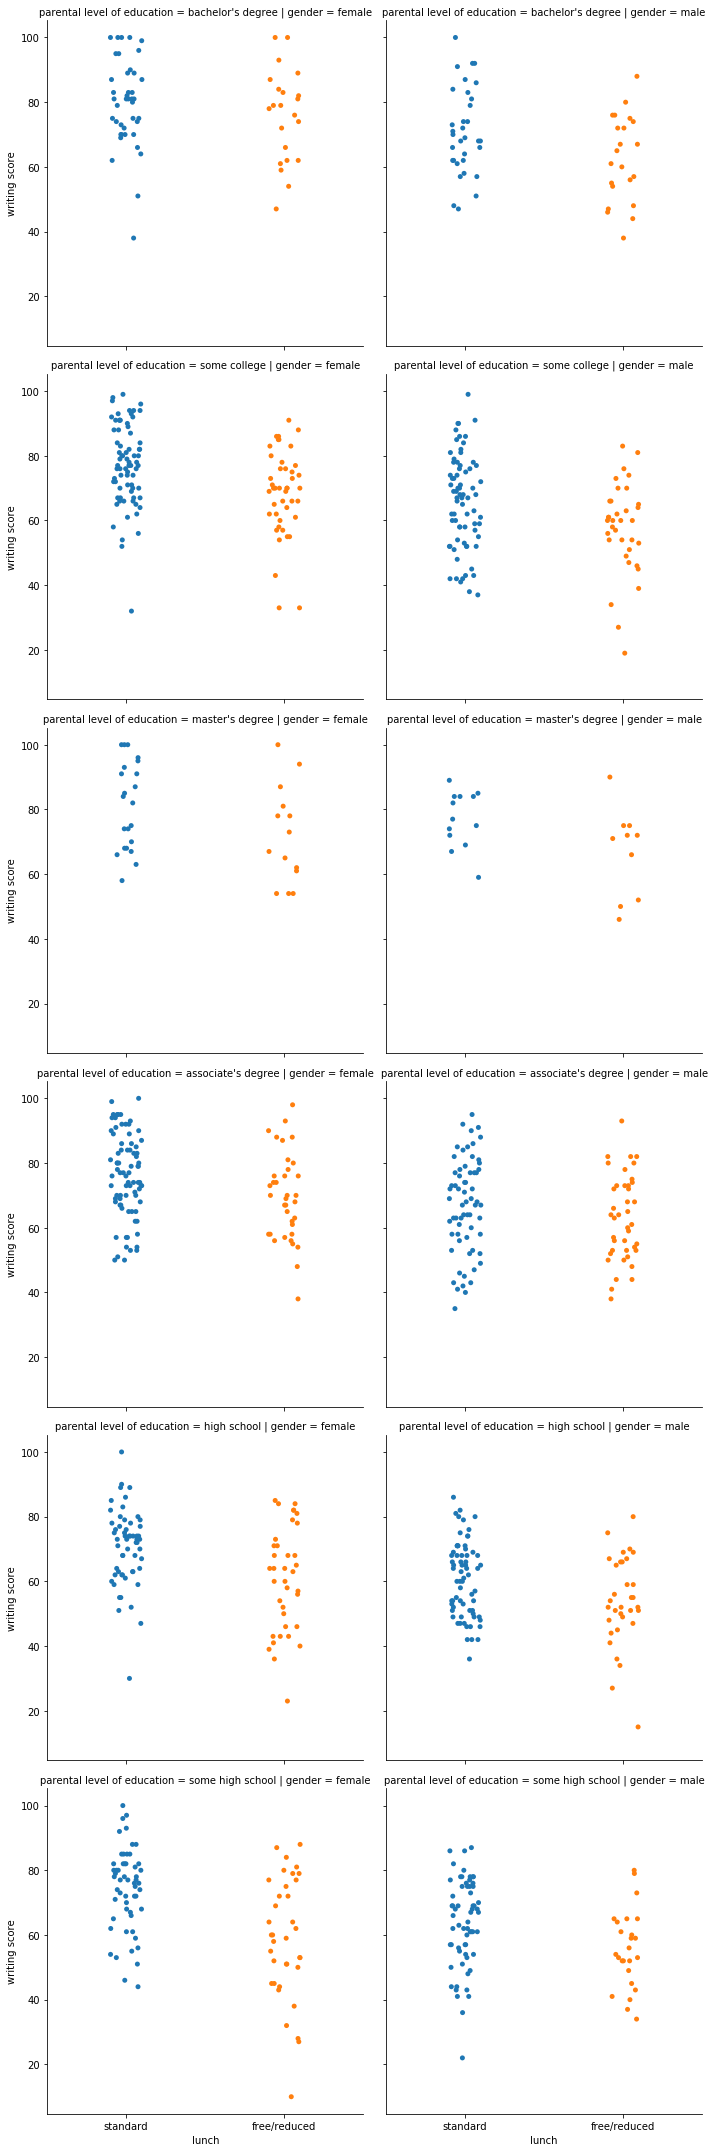

In [35]:
            #Multivariate analysis:
sns.catplot(x="lunch",y="writing score",data=data,row="parental level of education",col='gender')

### Conclusions:

The above graps is ploted to compare the Writing scores of students who receive Standard and free/reduced food against the educational background of their parents while a particular gender is considered.

1. From the above graphs, it can be observed that in row 1 and row 4,i.e the students with parents from bachelor's and assoicates degree , the density of Female Students is concentrated in the  above half of the graph. 
2. However, from the above graphs, the Students who get Standard food, irrespective of any other group, score more than the students who receive free/reduced food.
3. we can also observe that all the students who score less than 20% are the students with parents of educational background of some high school or high school or some college and who receive free/reduced food.
4. Most of The scores of Students ,with parents educational background as Masters degree, is all more than 60%, irrespective of the gender.
5. So, it can be concluded that most of te Students, who has Standard Food and with parents educational background as Master's degree / Bachelor's degre and Assoisates degree, Score more in Writing. 

Finally it can be concluded that, the students who belong to Group D and Group E with parents with educational background of Assoisates , Bachelor's and Master's degree who receive Standard Food has more chance to Score More, i.e either greater than 80% or Merit,i.e 100%.


In [36]:
#Correllation
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


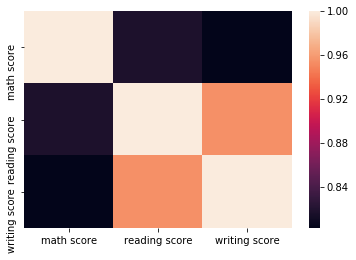

In [37]:
sns.heatmap(data.corr())

#### Hyphothesis Testing:
    
1. To observe the relationship between the mathscore and Parental level of education.
   H0 - There is no relationship between the two categorical variables

In [38]:
contingency_table=pd.crosstab(data["parental level of education"],data["mathscore_range"])
contingency_table

mathscore_range,0-19,20-39,40-59,60-79,80-99,100
parental level of education,,,,,,
associate's degree,0,3,69,90,58,2
bachelor's degree,0,4,23,63,26,2
high school,1,13,65,97,20,0
master's degree,0,0,17,24,18,0
some college,1,5,58,121,38,3
some high school,2,11,51,89,26,0


In [42]:
Observed= contingency_table.values 
print("Observed:-\n",Observed)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:6,0])
no_of_columns=len(contingency_table.iloc[0,0:6])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Observed:-
 [[  0   3  69  90  58   2]
 [  0   4  23  63  26   2]
 [  1  13  65  97  20   0]
 [  0   0  17  24  18   0]
 [  1   5  58 121  38   3]
 [  2  11  51  89  26   0]]
Expected Values :-
 [[  0.888   7.992  62.826 107.448  41.292   1.554]
 [  0.472   4.248  33.394  57.112  21.948   0.826]
 [  0.784   7.056  55.468  94.864  36.456   1.372]
 [  0.236   2.124  16.697  28.556  10.974   0.413]
 [  0.904   8.136  63.958 109.384  42.036   1.582]
 [  0.716   6.444  50.657  86.636  33.294   1.253]]
Degree of Freedom:- 25
chi-square statistic:- 18.662068781355316
critical_value: 37.65248413348277
p-value: 0.8130292119120904
Significance level:  0.05
Degree of Freedom:  25
chi-square statistic: 18.662068781355316
critical_value: 37.65248413348277
p-value: 0.8130292119120904
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


## Raghavendra K
### f20190120@hyderabad.bits-pilani.ac.in